In [2]:
# 전이 학습 VGG16 사용
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, Activation
from tensorflow.keras import optimizers, Input, Model, metrics
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [4]:
t_model =VGG16(input_shape=(150,150,3),include_top=False)  # input_top= False로 input의 값을 원하는데로 설정 가능
t_model.trainable = False
t_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [5]:
f_model = Sequential()
f_model.add(t_model)
f_model.add(Flatten())
f_model.add(Dense(64, activation='relu'))
f_model.add(Dropout(0.5))
f_model.add(Dense(1, activation='sigmoid'))

f_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,239,105
Trainable params: 524,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
# 이미지 부풀리기/늘리기 (데이터 전처리)    ImageDataGenerator는 사진을 읽는 모듈 함수  
train_data_gn = ImageDataGenerator(rescale=1./255,          # 정규화
                                   horizontal_flip=True,    # 수평 뒤집기
                                   width_shift_range=.1,    # 수평 이동
                                   height_shift_range=.1,   # 수직 이동
                                   fill_mode='nearest')     # 빈 공간 채우기
                        # flow_from_directory(이미지 경로 설정하면 경로애서 이미지 가져옴)
train_gn = train_data_gn.flow_from_directory('data/chap.20/train', target_size=(150,150), batch_size=5, class_mode='binary')

test_data_gn = ImageDataGenerator(rescale=1./255)

test_gn = test_data_gn.flow_from_directory('data/chap.20/test', target_size=(150,150), batch_size=5, class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [9]:
f_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate = .0002), metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3)

history = f_model.fit(train_gn, epochs=200, validation_data=(test_gn),validation_steps=10, callbacks=[early_stopping])

Epoch 1/200
32/32 [==============================] - 17s 471ms/step - loss: 0.6967 - accuracy: 0.6187 - val_loss: 0.5197 - val_accuracy: 0.7800
Epoch 2/200
32/32 [==============================] - 17s 528ms/step - loss: 0.5292 - accuracy: 0.7312 - val_loss: 0.4497 - val_accuracy: 0.8200
Epoch 3/200
32/32 [==============================] - 19s 591ms/step - loss: 0.4400 - accuracy: 0.8188 - val_loss: 0.3705 - val_accuracy: 0.9200
Epoch 4/200
32/32 [==============================] - 18s 572ms/step - loss: 0.4228 - accuracy: 0.7875 - val_loss: 0.3407 - val_accuracy: 0.8600
Epoch 5/200
32/32 [==============================] - 18s 575ms/step - loss: 0.3720 - accuracy: 0.8438 - val_loss: 0.3509 - val_accuracy: 0.8800
Epoch 6/200
32/32 [==============================] - 18s 572ms/step - loss: 0.2885 - accuracy: 0.9125 - val_loss: 0.2634 - val_accuracy: 0.9200
Epoch 7/200
32/32 [==============================] - 19s 581ms/step - loss: 0.2848 - accuracy: 0.9125 - val_loss: 0.2988 - val_accuracy:

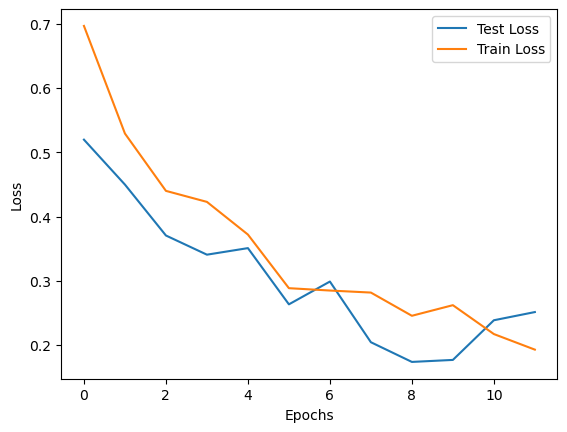

In [10]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, label='Test Loss')
plt.plot(x_len, y_loss, label='Train Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()